In [7]:
import pymongo
from pymongo import UpdateOne, UpdateMany
import time
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.pool import ThreadPool as pool

p = pool(3)



def write_bulk(obj):
    obj[0].bulk_write([UpdateMany({'channel' : f'{t}'}, {'$set': {f'{t}': obj[1][t][f'{t}'] + obj[2][:,t].tolist()}}) for t in range(48)])


#Must call this every time after a close event
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
try:
    peak = mydb.create_collection("adc_peak")
    area = mydb.create_collection("adc_area")
    width = mydb.create_collection("adc_width")
    cttot = mydb.create_collection("photon_total")
except:
    pass

adc_peak_base = np.array([[47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0] for z in range(2)])
adc_area_base = np.array([[1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818] for z in range(2)])
adc_width_base = np.array([[84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4] for z in range(2)])
count_total_base = np.array([[2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0] for z in range(2)]) 
peak_cursor = peak.find()
area_cursor = area.find()
width_cursor = width.find()
count_cursor = cttot.find()
manytimeset = []

# try:
for ct in range(2,70000,100):
# for ct in range(2,5):
    #Setup the array to be the size we want 2 - 70000
    adc_peak = np.array([[47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0] for t in range(ct)])
    adc_area = np.array([[1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818] for t in range(ct)])
    adc_width = np.array([[84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4] for t in range(ct)])
    count_total = np.array([[2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0] for t in range(ct)]) 

    #Put the intial array into the database, we are wiping each collection every loop so this will not be taken into account with the stats
    _ = mydb.adc_peak.insert_many({'channel' : f'{p}', f'{p}' : adc_peak_base[:,p].tolist()} for p in range(48))
    _ = mydb.adc_area.insert_many({'channel' : f'{p}', f'{p}' : adc_area_base[:,p].tolist()} for p in range(48))
    _ = mydb.adc_width.insert_many({'channel' : f'{p}', f'{p}' : adc_width_base[:,p].tolist()} for p in range(48))
    _ = mydb.photon_total.insert_many({'channel' : f'{p}', f'{p}' : count_total_base[:,p].tolist()} for p in range(48))

    #NOTE: There is no way to get away from doing it like this because we need to update the individual document not 
    start = time.time()
    p.map(write_bulk, [[peak, peak_cursor, adc_peak],[area, area_cursor, adc_area],[width, width_cursor, adc_width],[cttot, count_cursor, count_total],])
    # peak.bulk_write([UpdateMany({'channel' : f'peak {t}'}, {'$set': {f'{t}': peak_cursor[t][f'{t}'] + adc_peak[:,t].tolist()}}) for t in range(48)])
    # area.bulk_write([UpdateMany({'channel' : f'area {t}'}, {'$set': {f'{t}': area_cursor[t][f'{t}'] + adc_area[:,t].tolist()}}) for t in range(48)])
    # width.bulk_write([UpdateMany({'channel' : f'width {t}'}, {'$set': {f'{t}': width_cursor[t][f'{t}'] + adc_width[:,t].tolist()}}) for t in range(48)])
    # cttot.bulk_write([UpdateMany({'channel' : f'count {t}'}, {'$set': {f'{t}': count_cursor[t][f'{t}'] + count_total[:,t].tolist()}}) for t in range(48)])#this works
    end = time.time()
    manytimeset.append(end-start)

    peak.delete_many({})
    area.delete_many({})
    width.delete_many({})
    cttot.delete_many({})


mydb.drop_collection(peak)
mydb.drop_collection(area)
mydb.drop_collection(width)
mydb.drop_collection(cttot)
myclient.close()
timexmany = [l for l in range(2,70000,100)]

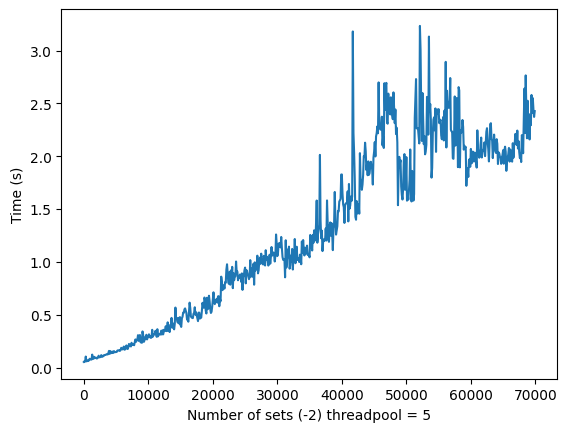

In [4]:
import matplotlib.pyplot as plt
plt.plot(timexmany, manytimeset)
# plt.ylim(0,10)
plt.xlabel('Number of sets (-2) threadpool = 5')
plt.ylabel('Time (s)')
plt.show()

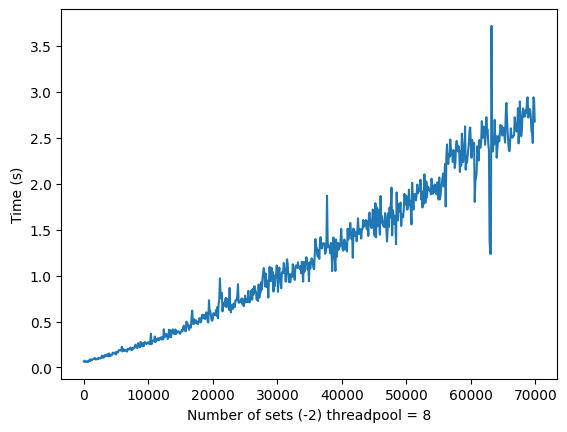

In [6]:
import matplotlib.pyplot as plt
plt.plot(timexmany, manytimeset)
# plt.ylim(0,10)
plt.xlabel('Number of sets (-2) threadpool = 8')
plt.ylabel('Time (s)')
plt.show()

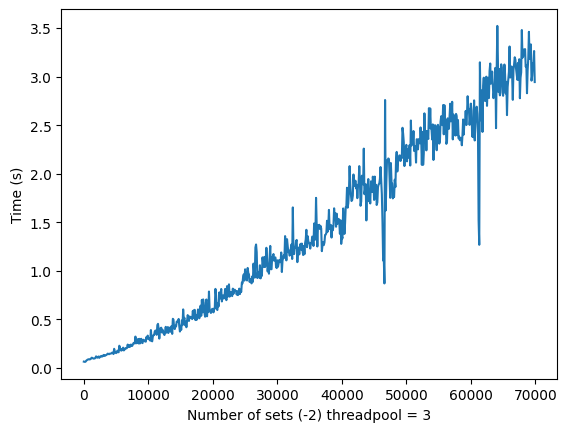

In [8]:
import matplotlib.pyplot as plt
plt.plot(timexmany, manytimeset)
# plt.ylim(0,10)
plt.xlabel('Number of sets (-2) threadpool = 3')
plt.ylabel('Time (s)')
plt.show()

Going to give quest DB a try now

In [1]:
import numpy as np
peak_base = [47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0]
area_base = [1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818]
width_base = [84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4]
count_base = [2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from questdb.ingress import Sender, TimestampNanos, Buffer, TimestampMicros
import pandas as pd
import numpy as np
import time
import requests
from multiprocessing.pool import ThreadPool as pool
import concurrent.futures


# def buf_extend():


# p = pool(5)
peak_vals = {}
area_vals = {}
width_vals = {}
count_vals = {}
# NOTE: We can hardcode this because if nothing is there then we put zeros in the real world
for t in range(48):
    peak_vals[f'PEAK {t}'] = peak_base[t]
    area_vals[f'AREA {t}'] = area_base[t]
    width_vals[f'WIDTH {t}'] = width_base[t]
    count_vals[f'COUNT {t}'] = count_base[t]

dict1 = {}
dict1.update(peak_vals)
dict1.update(area_vals)
dict1.update(width_vals)
dict1.update(count_vals)
# print(dict1)
buf = Buffer()

df1 = pd.DataFrame.from_dict(peak_vals, orient='index')
df2 = pd.DataFrame.from_dict(area_vals, orient='index')
df3 = pd.DataFrame.from_dict(width_vals, orient='index')
df4 = pd.DataFrame.from_dict(count_vals, orient='index')
df = pd.concat([df1,df2,df3,df4], axis=0)

#NOTE: Would like to change this to also allow the flush size to happen more frequently
conf = f'http::addr=localhost:9000;max_buf_size=500000000;auto_flush=on;auto_flush_rows=10000;' 
# conf = f'http::addr=localhost:9000;max_buf_size=500000000;auto_flush=on;'     
attime = TimestampNanos.now()    

timedelay = []
timelongdelay = []
with Sender.from_conf(conf) as sender:
    # buf.dataframe(df.T, table_name='daq', at=TimestampNanos.now())
    # sender.flush(buf)

    # for i in range(1, 502, 100):
    for i in range(0, 71000, 1000):
        print(f"step: {i}")
        #NOTE: removing the setup of the table because this seems to take 2 seconds + and only exist on the first setup
        # sender.row(
        #     'sensors',
        #     columns=dict1,
        #     at=TimestampNanos.now())
        # buf.dataframe(df.T, table_name='sensors', at=TimestampNanos.now())
        # sender.flush(buf)
        sender.row('sensors', columns=dict1, at=attime)
        # sender.dataframe(df.T, table_name='sensors', at=TimestampNanos.now())
        # sender.dataframe(df.T, table_name='sensors', at=attime)
        # print(f"time for first dataframe: {start - time.perf_counter()}")
        sender.flush()
        # print(f"time for first dataframe and flush: {start - time.perf_counter()}")
        # x = input("hold two")
        
        startlong = time.perf_counter()
        # timestart = TimestampNanos.now()
        # info = df.T
        # for c in range(i):
        #     info = pd.concat([info, df.T], axis=0)
        # info = [df.T for c in range(i)] #Make the dataframe here
        # data = [peak_base for c in range(i)]
        # print(info)
        for c in range(i):
            with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
                executor.submit(sender.row(
                'sensors',
                columns = dict1,
                at=attime
                ))
                # print('Hi')
                # executor.submit(sender.dataframe(df.T, table_name='sensors', at=TimestampNanos.now()))
                # executor.submit(sender.dataframe(df.T, table_name='sensors', at=attime))
        # for c in range(i):
            # p.add_task()
            # sender.row(
            # 'sensors',
            # columns = dict1,
            # at=TimestampNanos.now()
            # )
            # buf.dataframe(df.T, table_name='sensors', at=TimestampNanos.now())
            # sender.dataframe(df.T, table_name='sensors', at=TimestampNanos.now())
        start = time.perf_counter()
        # sender.dataframe(info, table_name='sensors', at=TimestampNanos.now())
        # print(f"time to append data frames: {time.perf_counter() - startlong}")
        # sender.flush(buf)
        sender.flush()
        end = time.perf_counter()
        timedelay.append(end - start)
        timelongdelay.append(end-startlong)
        # x = input("hold one")
        resp = requests.get('http://localhost:9000/exp',
                            {
                                'query' : 'DROP TABLE sensors'
                            })

timexdelay = [l for l in range(0,71000,1000)]


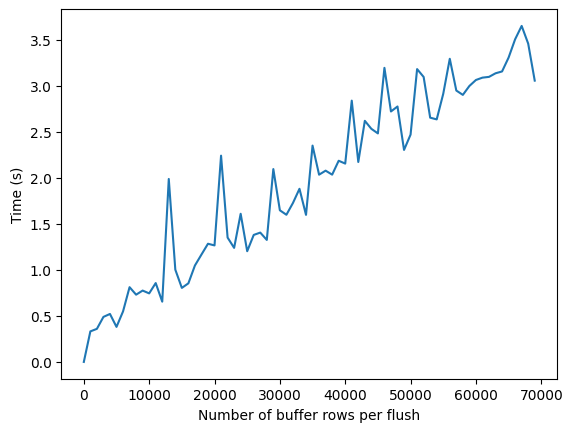

In [21]:
import matplotlib.pyplot as plt
plt.plot(timexdelay, timedelay)
# plt.ylim(0,10)
plt.xlabel('Number of buffer rows per flush')
plt.ylabel('Time (s)')
plt.show()

This sets up the data base and the next two blocks create 70k rows and then `c.execute()` commits the query

In [77]:
import psycopg # works well
import numpy as np
import time

channels_expr = ""

num_channels = 12
feature_name = "PEAKHEIGHT" # for example

for ch in np.arange(num_channels):
    channels_expr+=f"CH{ch} INTEGER, "

create_peakheight_table = \
f"CREATE TABLE {feature_name} (EVENT_ID INTEGER, TIME BIGINT, {channels_expr[:-2]})"

db_params = {
"host": "127.0.0.1",
"dbname": "postgres",
"user": "postgres",
"password": "password",
"port": "5432"
}

db_conn = psycopg.connect(**db_params)
c = db_conn.cursor()
db_conn.autocommit = True
req_start = time.monotonic()
c.execute(create_peakheight_table)
req_stop = time.monotonic()

print((req_stop - req_start))
print(c.statusmessage)

0.0
CREATE TABLE


In [79]:
query_string = "INSERT into PEAKHEIGHT(event_id, time, ch0, ch1, ch2, ch3, ch4, ch5, ch6, ch7, ch8, ch9, ch10, ch11) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"

def current_milli_time():
    return round(time.time() * 1000)

def single_row_string(id, ts, ch0, ch1, ch2, ch3, ch4, ch5, ch6, ch7, ch8, ch9, ch10, ch11):
    return f" ({id}, {ts}, {ch0}, {ch1}, {ch2}, {ch3}, {ch4}, {ch5}, {ch6}, {ch7}, {ch8}, {ch9}, {ch10}, {ch11}),"

def make_row_string(id, ts, channel_values):
    query_string = "%s, %s" % (str(id), str(ts))
    print(f"query_String: {query_string}")
    for chv in channel_values:
        query_string += f", {str(chv)}"
    print(f"query_String: {query_string}")

    return f" ({query_string}),"

def make_composite_row_string(query_string_base, rows):
    # new_query_string = query_string_base
    # for row_args in rows:
    #     new_query_string += make_row_string(row_args[0], row_args[1], row_args[2:])

    # new_query_string = query_string_base

    # return new_query_string[:-1] + " RETURNING event_id;"
    return query_string_base

rows = []
for id in np.arange(start=0,stop=1):
    row = [id, current_milli_time()]
    row.extend([i for i in np.random.randint(low=0, high=32767, size=12)])
    rows.append(row)

test_string = make_composite_row_string(query_string, rows)

In [62]:
print(str(rows[0]))
# x = *rows[0]
print(*rows[0])
# print(', '.join(str(rows[0])))

[0, 1723056910854, 16997, 6604, 19041, 12457, 24561, 2067, 6788, 9808, 11580, 11574, 7054, 6795]
0 1723056910854 16997 6604 19041 12457 24561 2067 6788 9808 11580 11574 7054 6795


In [72]:
print(test_string)
print(rows[0])

INSERT into PEAKHEIGHT(event_id, time, ch0, ch1, ch2, ch3, ch4, ch5, ch6, ch7, ch8, ch9, ch10, ch11) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
[0, 1723056910854, 16997, 6604, 19041, 12457, 24561, 2067, 6788, 9808, 11580, 11574, 7054, 6795]


In [25]:
print(len(test_string))

223


In [80]:
c.execute(test_string, rows[0])

<psycopg.Cursor [COMMAND_OK] [IDLE] (host=127.0.0.1 database=postgres) at 0x297e24c1fd0>

: 

In [76]:
c.execute("DROP TABLE peakheight")

<psycopg.Cursor [COMMAND_OK] [IDLE] (host=127.0.0.1 database=postgres) at 0x297e24c1d90>

In [65]:
t = c.execute("SELECT ch0 FROM peakheight")
print(t)

<psycopg.Cursor [TUPLES_OK] [IDLE] (host=127.0.0.1 database=postgres) at 0x297bb126210>


In [ ]:
c.execute(f"SELECT ARRAY_AGG(ch0) FROM peakheight", binary=True)
start = time.perf_counter()
arr1 = c.fetchone()
print(time.perf_counter() - start)
print(arr1)

In [3]:
# print(len(arr))
arr = c.execute("SELECT ARRAY_AGG(ch0) FROM peakheight", binary=True)
start = time.perf_counter()
for x in arr:
    z = x
print(time.perf_counter() - start)


0.0017001000232994556


In [ ]:
# print(len(arr[0][0]))
arr = [1,1,1,1]
if not arr:
    print("hehe")
if arr:
    print("yay")
arr.append(1)
if not arr:
    print("hehe")
arr.append(1)
if arr is None:
    print("hehe")

In [3]:
from multiprocessing.pool import ThreadPool as pool
import numpy as np
import cupy as cp


def output(input):
    print(f"input: {input}")



arr = np.asarray([
    [1,2,3,4,5,6,7,8,9],
    [2,3,4,5,6,7,8,9,1],
    [3,4,5,6,7,8,9,1,2],
    [4,5,6,7,8,9,1,2,3],
    [5,6,7,8,9,1,2,3,4],
    [5,6,7,8,9,1,2,3,4],
    [1,2,3,4,5,6,7,8,9],
    [2,3,4,5,6,7,8,9,1],
    [3,4,5,6,7,8,9,1,2],
    [4,5,6,7,8,9,1,2,3],
    [5,6,7,8,9,1,2,3,4],
    [5,6,7,8,9,1,2,3,4],
    [1,2,3,4,5,6,7,8,9],
    [2,3,4,5,6,7,8,9,1],
    [3,4,5,6,7,8,9,1,2],
    [4,5,6,7,8,9,1,2,3],
    [5,6,7,8,9,1,2,3,4],
    [5,6,7,8,9,1,2,3,4]
    ])

# print(arr.T)

testd = {}
testd['arr'] = []
testd['count'] = []
# arr = [
#     [1,2,3,4,5,6,7,8,9],
#     [2,3,4,5,6,7,8,9,1],
#     [3,4,5,6,7,8,9,1,2],
#     [4,5,6,7,8,9,1,2,3],
#     [5,6,7,8,9,1,2,3,4],
#     [5,6,7,8,9,1,2,3,4]
# ]

change = cp.array(arr.T)
print(change)

new = cp.asnumpy(change)
print(new)

testd['arr'].extend(arr)
print(testd)

testd['count'].extend(arr)
print(testd)

testd['arr'].extend(arr)
print(testd)

# testd['arr'] = arr.T

# p = pool(3)

# p.map(output, testd['arr'])

[[1 2 3 4 5 5 1 2 3 4 5 5 1 2 3 4 5 5]
 [2 3 4 5 6 6 2 3 4 5 6 6 2 3 4 5 6 6]
 [3 4 5 6 7 7 3 4 5 6 7 7 3 4 5 6 7 7]
 [4 5 6 7 8 8 4 5 6 7 8 8 4 5 6 7 8 8]
 [5 6 7 8 9 9 5 6 7 8 9 9 5 6 7 8 9 9]
 [6 7 8 9 1 1 6 7 8 9 1 1 6 7 8 9 1 1]
 [7 8 9 1 2 2 7 8 9 1 2 2 7 8 9 1 2 2]
 [8 9 1 2 3 3 8 9 1 2 3 3 8 9 1 2 3 3]
 [9 1 2 3 4 4 9 1 2 3 4 4 9 1 2 3 4 4]]
[[1 2 3 4 5 5 1 2 3 4 5 5 1 2 3 4 5 5]
 [2 3 4 5 6 6 2 3 4 5 6 6 2 3 4 5 6 6]
 [3 4 5 6 7 7 3 4 5 6 7 7 3 4 5 6 7 7]
 [4 5 6 7 8 8 4 5 6 7 8 8 4 5 6 7 8 8]
 [5 6 7 8 9 9 5 6 7 8 9 9 5 6 7 8 9 9]
 [6 7 8 9 1 1 6 7 8 9 1 1 6 7 8 9 1 1]
 [7 8 9 1 2 2 7 8 9 1 2 2 7 8 9 1 2 2]
 [8 9 1 2 3 3 8 9 1 2 3 3 8 9 1 2 3 3]
 [9 1 2 3 4 4 9 1 2 3 4 4 9 1 2 3 4 4]]
{'arr': [array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([2, 3, 4, 5, 6, 7, 8, 9, 1]), array([3, 4, 5, 6, 7, 8, 9, 1, 2]), array([4, 5, 6, 7, 8, 9, 1, 2, 3]), array([5, 6, 7, 8, 9, 1, 2, 3, 4]), array([5, 6, 7, 8, 9, 1, 2, 3, 4]), array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([2, 3, 4, 5, 6, 7, 8, 9, 1]),

In [43]:
import numpy as np
arr = []
extra = np.array([1,2,3,4,5,6])
arr.append(extra)
arr.append(extra)
print(arr)
print(np.array(arr, ndmin=2).T)
print(np.array(extra, ndmin=2).T)
print(np.column_stack(arr))
print(extra.ndim)
print(np.asarray(arr).ndim)
# print(len(arr))
# print(len(arr[0]))
# data = np.reshape(arr, (len(arr[0])), 0)

[array([1, 2, 3, 4, 5, 6]), array([1, 2, 3, 4, 5, 6])]
[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]]
1
2


: 

In [12]:
from rocksdict import Rdict
import numpy as np
import pandas as pd

path = str("./test_dict")

# create a Rdict with default options at `path`
db = Rdict(path)
db[1.0] = 1
db["huge integer"] = 2343546543243564534233536434567543
db["good"] = True
db["bytes"] = b"bytes"
db["this is a list"] = [1, 2, 3]
db["store a dict"] = {0: 1}
db[b"numpy"] = np.array([1, 2, 3])
db["a table"] = pd.DataFrame({"a": [1, 2], "b": [2, 1]})

# reopen Rdict from disk
db.close()
db = Rdict(path)
assert db[1.0] == 1
assert db["huge integer"] == 2343546543243564534233536434567543
assert db["good"] == True
assert db["bytes"] == b"bytes"
assert db["this is a list"] == [1, 2, 3]
assert db["store a dict"] == {0: 1}
assert np.all(db[b"numpy"] == np.array([1, 2, 3]))
assert np.all(db["a table"] == pd.DataFrame({"a": [1, 2], "b": [2, 1]}))

# iterate through all elements
for k, v in db.items():
    print(f"{k} -> {v}")

# batch get:
print(db[["good", "bad", 1.0]])
# [True, False, 1]

# delete Rdict from dict
db.close()
Rdict.destroy(path)


b'numpy' -> [1 2 3]
a table ->    a  b
0  1  2
1  2  1
bytes -> b'bytes'
good -> True
huge integer -> 2343546543243564534233536434567543
store a dict -> {0: 1}
this is a list -> [1, 2, 3]
1.0 -> 1
[True, None, 1]


In [52]:
import time
starttime = time.perf_counter()
tot = sum(arr1)
print(f"time elapsed: {time.perf_counter()-starttime}\nTotal: {tot}")

time elapsed: 0.00012779998360201716
Total: 38056958


In [8]:
# import time
# print(time.time())
output = {}
output["data"] = [1]
output["new"] = [1,2]

if output["data"] and output["new"]:
    print("yay")
else:
    print("no")
# time.sleep(1)

# print(time.time())

1721324125.956529
yay
1721324126.9577155


In [ ]:
self.visualUpdate.emit(args[0]['count_data'])
p.map(process, args[0]["adc_data"])

https://pytorch.org/get-started/locally/

In [ ]:
import torch

t1 = torch.tensor(arr1)

In [20]:
# import time
# print(time.gmtime().tm_year)

import os
PATH = os.path.realpath("../ZMQTesting/explanation.txt")
print(PATH)

f = open("../ZMQTesting/explanation.txt")
print(f)
f.close()


C:\Users\MichaelKolb\Github\ZMQTesting\explanation.txt
<_io.TextIOWrapper name='../ZMQTesting/explanation.txt' mode='r' encoding='cp1252'>
hi


In [22]:
test = "continue"

timestart = time.perf_counter()
adc_max_index = np.where(arr3 == max(arr3))[0].item(0)
adc_peak = arr3[adc_max_index]
adc_min = min(arr3)
start,end = 0,0
half_max = int((adc_peak + adc_min) / 2)

half_max_index = np.where(arr3 == half_max)[0]
start = 0
# for end in half_max_index:
for end in half_max_index:
    if end > adc_max_index:
        break
    start = end

adc_width = (end - start)
adc_area = sum(arr3[start:end]/(adc_min * adc_width))
print(f"Time elapsed: {time.perf_counter() - timestart}")
print(f"Max index: {adc_max_index}\nADC Peak: {adc_peak}\nADC Min: {adc_min}\nArea: {area}\
    \nHalf Max: {half_max}\nStart: {start}\nEnd: {end}\nADC Width: {adc_width}\nADC Area: {adc_area}\
    \nHalf Max Index: {half_max_index}")

hi


In [ ]:
self.visualUpdate.emit(args[0]['count_data'])
p.map(process, args[0]["adc_data"])

https://pytorch.org/get-started/locally/

In [6]:
import torch
x = torch.tensor([0,1,2,3,4])

tensor(0)


In [22]:
import numpy as np
arr = [[1,2,3],[4,5,6],[7,8,9],[1,2,3],[4,5,6],[7,8,9]]
y = []
for i in range(0, 7, 3):
    y.append(i)
print(y)
print(np.add.reduceat(arr, [0,2,4]))
# print(np.add(arr))

[0, 3, 6]
[[ 5  7  9]
 [ 8 10 12]
 [11 13 15]]


In [1]:
import time
print(time.perf_counter())

349266.2153721


In [20]:
import numpy as np
import time

a = np.zeros(12)
b = np.zeros(24)
c = np.zeros(12)

start = time.perf_counter()
b = b+a if len(a) == len(b) else b[:len(a)] + a
print(time.perf_counter() - start)
print(b)

start = time.perf_counter()
c += a
print(time.perf_counter() - start)

0.000224200077354908
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
7.740000728517771e-05


In [3]:
test = []
if test:
    print("yay")

yay


In [6]:
conn = "DAQ"

if conn not in ["DAQ","MB"]:
    print('yay')

In [12]:
import uuid

unique_id = uuid.uuid4().hex
print(unique_id)

bd056671a2ee42d18917f4b0612f6a49


In [29]:
class PlotConfiguration:
    """
    """
    def __init__(self):
        self.identifier = 'x'
        self.type = 'x'
        self.location = 'x'
        
        self.num_bins = 'x'
        
        self.display_feature = 'x'

        self.x_feature = 'x'
        self.x_step = 'x'
        self.x_min_range = 'x'
        self.x_max_range = 'x'

        self.y_feature = 'x'
        self.y_step = 'x'
        self.y_min_range = 'x'
        self.y_max_range = 'x'

    def update_values(self, values):
        features = [self.type, self.location, self.num_bins, self.display_feature, self.x_feature, 
                    self.y_feature, self.x_step, self.y_step, self.x_min_range, self.y_min_range, self.x_max_range, self.y_max_range]
        n = len(values)
        if len(features) != n:
            return False
        for i in range(n):
            features[i] = values[i]
        
        return True

class GateConfiguration:
    """
    """
    def __init__(self):
        self.identifier = 'x'
        self.type = 'x'
        self.base_graph = 'x'

        self.x = 'x'
        self.y = 'x'
        self.w = 'x'
        self.h = 'x'

    def update_values(self, values):
        features = [self.type, self.x, self.y, self.w, self.h]
        n = len(values)
        if len(features) != n:
            return False
        for i in range(n):
            features[i] = values[i]
        
        return True


tempPlot = PlotConfiguration()
print(tempPlot.__dict__)
tempGate = GateConfiguration()
print(tempGate.__dict__)
print(tempPlot.__dict__.keys())
print(tempPlot.__dict__.values())

{'identifier': 'x', 'type': 'x', 'location': 'x', 'num_bins': 'x', 'display_feature': 'x', 'x_feature': 'x', 'x_step': 'x', 'x_min_range': 'x', 'x_max_range': 'x', 'y_feature': 'x', 'y_step': 'x', 'y_min_range': 'x', 'y_max_range': 'x'}
{'identifier': 'x', 'type': 'x', 'base_graph': 'x', 'x': 'x', 'y': 'x', 'w': 'x', 'h': 'x'}
dict_keys(['identifier', 'type', 'location', 'num_bins', 'display_feature', 'x_feature', 'x_step', 'x_min_range', 'x_max_range', 'y_feature', 'y_step', 'y_min_range', 'y_max_range'])
dict_values(['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'])


In [52]:
import configparser as cfp
import os

config_path = 'testconfig.ini'

config = cfp.ConfigParser(strict=False)
if os.path.exists(config_path):
    config.read(config_path)
    
else:
    # config['plots'] = {1: tempPlot.__dict__, 2: tempPlot.__dict__}
    # config['gates'] = {1: tempGate.__dict__, 2: tempGate.__dict__}
    config.add_section('plots')
    config.add_section('gates')
    for n in range(2):
        # config['plots'][f"{n}"] = tempPlot.__dict__
        # config['gates'][f"{n}"] = tempGate.__dict__
        # config.add_section('plots')
        config.set('plots', f"{n}", str(tempPlot.__dict__.values()).replace("dict_values", ""))
        config.set('gates', f"{n}", str(tempGate.__dict__.values()).replace("dict_values", ""))
    with open(config_path, 'w') as configfile:
        config.write(configfile)
    configfile.close()
    config.read(config_path)

# print(len(config.items('plots')))
# print(type(config.items('plots')))
# print(type(config.items('plots')[0]))
print(config.items('plots'))
for i in config.items('plots'):
    print(f"i: {i[1]}")
    temp = i[1].replace(",", "").replace("'", "").replace("[", "").replace("]", "").replace("(", "").replace(")", "")
    print(temp)
    for n in temp:
        if n != " ":
            print(n)

print("\n")
print(config.items('plots'))
print("\n")
print(config.items('gates'))


[('0', "(['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'])"), ('1', "(['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'])")]
i: (['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'])
x x x x x x x x x x x x x
x
x
x
x
x
x
x
x
x
x
x
x
x
i: (['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'])
x x x x x x x x x x x x x
x
x
x
x
x
x
x
x
x
x
x
x
x


[('0', "(['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'])"), ('1', "(['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'])")]


[('0', "(['x', 'x', 'x', 'x', 'x', 'x', 'x'])"), ('1', "(['x', 'x', 'x', 'x', 'x', 'x', 'x'])")]


In [73]:
tstlst = '5 5 5 5 5 5 5 5 5 5 5 5 5'
a = tstlst.split()
print(a)
chg = [0,2,3,6,7,8,10,11,12]
for i in chg:
    a[i] = int(a[i])
print(a)
# print(b)

['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5']
[5, '5', 5, 5, '5', '5', 5, 5, 5, '5', 5, 5, 5]


In [78]:
#A - 65 | Z - 90
x = 48
first = int(x / 26)
second = int(x % 26)
print(chr(first + 64))
print(chr(second + 64))

A
V


In [31]:
x = 48
lst = [1,2,3,4,5]
lst = [x] + lst
print (lst)
# lst.pop(0)
# print(lst)

[48, 1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


In [39]:
temp = {}
temp.update({'test' : 0})
print(temp)
temp['test'] = 67
print(temp)
temp.update({'test1' : 0})
print(temp)
temp['test1'] = 52
print(temp)
# temp.pop('test')
# print(temp)

{'test': 0}
{'test': 67}
{'test': 67, 'test1': 0}
{'test': 67, 'test1': 52}


TypeError: dict.keys() takes no arguments (1 given)

In [3]:
import uuid

x = uuid.uuid4().int
print(type(x))
y = str(x)
print(int(y))

<class 'int'>
187108417849012839742626830974612156820


In [6]:
x = [1,2,3,4,5,5,6,7]
print(x[0:-1])

[1, 2, 3, 4, 5, 5, 6]


In [1]:
import numpy as np

x = np.linspace(0, 10, 100)
print(x)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

In [4]:
x = [152616.0, 178350.0, 163816.0, 175424.0, 179320.0, 167596.0, 169052.0, 182634.0, 181324.0, 193568.0, 171024.0, 187198.0, 182878.0, 182792.0, 181768.0, 187486.0, 184836.0, 166420.0, 1309866.0, 176782.0, 169596.0, 183666.0, 175786.0, 191794.0, 187278.0, 174564.0, 169012.0, 161920.0, 175216.0, 182692.0, 162824.0, 183868.0, 155708.0, 335550.0, 149388.0, 184666.0, 170798.0, 179886.0, 177450.0, 162588.0, 202548.0, 174544.0, 191986.0, 187234.0, 154136.0, 175528.0, 183760.0, 184678.0, 196198.0, 176084.0, 183836.0, 180690.0, 187078.0, 166420.0, 177292.0, 173114.0, 172978.0, 184508.0, 18628.0, 170852.0, 177684.0, 178428.0, 168754.0, 182400.0, 176972.0, 100386.0, 151026.0, 179412.0, 184698.0, 180032.0, 173524.0, 164140.0, 176010.0, 175610.0, 184324.0, 181184.0, 192096.0, 191356.0, 201538.0, 194820.0, 198930.0, 179758.0, 191592.0, 175926.0, 166948.0, 172774.0, 199240.0, 169072.0, 194552.0, 134294.0, 194020.0, 205564.0, 171734.0, 178690.0, 188398.0, 193372.0, 171740.0, 160982.0, 200500.0, 183384.0, 172778.0, 168562.0, 173272.0, 188276.0, 187212.0, 175884.0, 169510.0, 160470.0, 172218.0, 174948.0, 179202.0, 190864.0, 187440.0, 193200.0, 320256.0, 178200.0, 168388.0, 172784.0, 132736.0, 185252.0, 175508.0, 191052.0, 179584.0, 169374.0, 152788.0, 210560.0, 173664.0, 186642.0, 190326.0, 166682.0, 175428.0, 353702.0, 181756.0, 187072.0, 202208.0, 172684.0, 186916.0, 178000.0, 163262.0, 177914.0, 178410.0, 195540.0, 182744.0, 163136.0, 176940.0, 186228.0, 176490.0, 162320.0, 175744.0, 144364.0, 193132.0, 167720.0, 179416.0, 172728.0, 175652.0, 165632.0, 203150.0, 178928.0, 201286.0, 174048.0, 174320.0, 191856.0, 171562.0, 175528.0, 193844.0, 196044.0, 168460.0, 178082.0, 184398.0, 195822.0, 148228.0, 226372.0, 167618.0, 172554.0, 187048.0, 166020.0, 155160.0, 199140.0, 196788.0, 186146.0, 180138.0, 188408.0, 196624.0, 161756.0, 123346.0, 198924.0, 192768.0, 190728.0, 284082.0, 146532.0, 179844.0, 535542.0, 178228.0, 163504.0, 199328.0, 160786.0, 186702.0, 302344.0, 175790.0, 163692.0, 185838.0, 93918.0, 174820.0, 185342.0, 175574.0, 168856.0, 167726.0, 177372.0, 186688.0, 183512.0, 179908.0, 161548.0, 171506.0, 173746.0, 182258.0, 166432.0, 161224.0, 188308.0, 320048.0, 195548.0, 172952.0, 161560.0, 165752.0, 180700.0, 168406.0, 180432.0, 200198.0, 194118.0, 175800.0, 190778.0, 194552.0, 187570.0, 172062.0, 133936.0, 228804.0, 184142.0, 184502.0, 178208.0, 170740.0, 177706.0, 164920.0, 229656.0, 168602.0, 175820.0, 289504.0, 189064.0, 174542.0, 166098.0, 188088.0, 180068.0, 187050.0, 183688.0, 174564.0, 188700.0, 174704.0, 181868.0, 163406.0, 191490.0, 180668.0, 172520.0, 185186.0, 197268.0, 190066.0, 135194.0, 181750.0, 167374.0, 335286.0, 172846.0, 185476.0, 180922.0, 150754.0, 182954.0, 147016.0, 181994.0, 183808.0, 176338.0, 168432.0, 209924.0, 193302.0, 178172.0, 170296.0, 183916.0, 198846.0, 167972.0, 188126.0, 186644.0, 168374.0, 187392.0, 171036.0, 204274.0, 181288.0, 184224.0, 187230.0, 172082.0, 176700.0, 172226.0, 161234.0, 94466.0, 175056.0, 122264.0, 283884.0, 198224.0, 24314.0, 188880.0, 190018.0, 180384.0, 188734.0, 167014.0, 229032.0, 171316.0, 192716.0, 184242.0, 179090.0, 169676.0, 197360.0, 193532.0, 168192.0, 187540.0, 191464.0, 143320.0, 196660.0, 184256.0, 137062.0, 171940.0, 162954.0, 196140.0, 179368.0, 23360.0, 174856.0, 175938.0, 275052.0, 166800.0, 171814.0]

for i in x:
    if i <= 50000:
        print(i)
        print(x.index(i))

18628.0
58
24314.0
302
23360.0
327


In [5]:
x = 'QPD'
y = '494nm'
print(any(map(str.isdigit,x)))
print(any(map(str.isdigit,y)))

False
True


In [ ]:
import pymongo
import csv

# Connect to MongoDB
db_client = pymongo.MongoClient("mongodb://localhost:27017/")
db = db_client["mydatabase"]
names = db.list_collection_names()

with open("output.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)

    print(names)
    for name in names:
    # Write the header row
        writer.writerow(name)
        total = db.get_collection(name).count_documents({})
        print(total)

    # Write the data rows
        cursor = db.get_collection(name).find().sort('event', pymongo.ASCENDING)
        for i in cursor:
            print(i)
            # print(i['ch 0'])

print("Data exported to output.csv")

['adc_width', 'adc_area', 'photon_total', 'adc_peak']
157
{'_id': ObjectId('673412485ae490e204750a64'), 'event': 0, 'ch 0': 921, 'ch 1': 936, 'ch 2': 917, 'ch 3': 909, 'ch 4': 900, 'ch 5': 909, 'ch 6': 834, 'ch 7': 926, 'ch 8': 928, 'ch 9': 925, 'ch 10': 893, 'ch 11': 925, 'ch 12': 910, 'ch 13': 904, 'ch 14': 910, 'ch 15': 904, 'ch 16': 936, 'ch 17': 935, 'ch 18': 843, 'ch 19': 923, 'ch 20': 931, 'ch 21': 930, 'ch 22': 677, 'ch 23': 926, 'ch 24': 910, 'ch 25': 901, 'ch 26': 925, 'ch 27': 908, 'ch 28': 874, 'ch 29': 795, 'ch 30': 925, 'ch 31': 0, 'ch 32': 935, 'ch 33': 891, 'ch 34': 920, 'ch 35': 0}
<class 'int'>
{'_id': ObjectId('673412485ae490e204750a91'), 'event': 1, 'ch 0': 913, 'ch 1': 925, 'ch 2': 911, 'ch 3': 910, 'ch 4': 926, 'ch 5': 924, 'ch 6': 802, 'ch 7': 936, 'ch 8': 917, 'ch 9': 936, 'ch 10': 906, 'ch 11': 932, 'ch 12': 903, 'ch 13': 909, 'ch 14': 920, 'ch 15': 922, 'ch 16': 918, 'ch 17': 924, 'ch 18': 870, 'ch 19': 927, 'ch 20': 909, 'ch 21': 911, 'ch 22': 678, 'ch 23': 9

In [ ]:
####### IGNORE THIS CODE
# y = db.get_collection(name)
# y.insert_one(dict object)

https://www.geeksforgeeks.org/how-to-save-a-python-dictionary-to-a-csv-file/

# with open('dict.csv', 'w') as csv_file:  
#     writer = csv.writer(csv_file)
#     for key, value in mydict.items():
#        writer.writerow([key, value])

# len(i) - 2
# field_names = ['_id', 'event', 'ch 0', 'ch 1', 'ch 2', 'ch 3', 'ch 4', 'ch 5', 'ch 6', 'ch 7', 'ch 8', 'ch 9', 'ch 10', 'ch 11', 'ch 12', 'ch 13', 'ch 14', 'ch 15',
#                'ch 16', 'ch 17', 'ch 18', 'ch 19', 'ch 20', 'ch 21', 'ch 22', 'ch 23', 'ch 24', 'ch 25', 'ch 26', 'ch 27', 'ch 28', 'ch 29', 'ch 30', 'ch 31',
#                'ch 32', 'ch 33', 'ch 34', 'ch 35']
# with open('Names.csv', 'w') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=field_names)
#     writer.writeheader(name)
#     for i in cursor:
#         writer.writerow(i)
#         # writer.writerows(i)

# To read it back:

# with open('dict.csv') as csv_file:
#     reader = csv.reader(csv_file)
#     mydict = dict(reader)


In [ ]:
import pandas as pd
from pymongo import MongoClient
import json

def mongoimport(csv_path, db_name, coll_name, db_url='localhost', db_port=27000)
    """ Imports a csv file at path csv_name to a mongo colection
    returns: count of the documants in the new collection
    """
    client = MongoClient(db_url, db_port)
    db = client[db_name]
    coll = db[coll_name]
    data = pd.read_csv(csv_path)
    payload = json.loads(data.to_json(orient='records'))
    coll.remove()
    coll.insert(payload)
    return coll.count()